In [247]:
# import repository (packages/libraries/modules)

import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf # import this function from this submodule
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import gaussian_kde, norm, iqr, skew, kurtosis, jarque_bera, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors
import scipy.signal as ss
import pylab
!pip install python-docx

# PRELIMINARY STEP 1

In [171]:
#download the time series data of COCA-Cola from 1986 ( entire year inclued) to 2024
KO = yf.download("KO", start="1989-12-31", end="2024-12-31")
KO.head()

C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\143486034.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  KO = yf.download("KO", start="1989-12-31", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
1990-01-02,2.072806,2.072806,2.039588,2.052876,12128000
1990-01-03,2.042910,2.069484,2.036266,2.069484,12976000
1990-01-04,2.032944,2.046231,2.006370,2.042910,7841600
1990-01-05,2.016335,2.052875,2.013013,2.032944,8305600
1990-01-08,2.059519,2.059519,2.009692,2.016336,10064000


extract and plot log prices (additional materials)

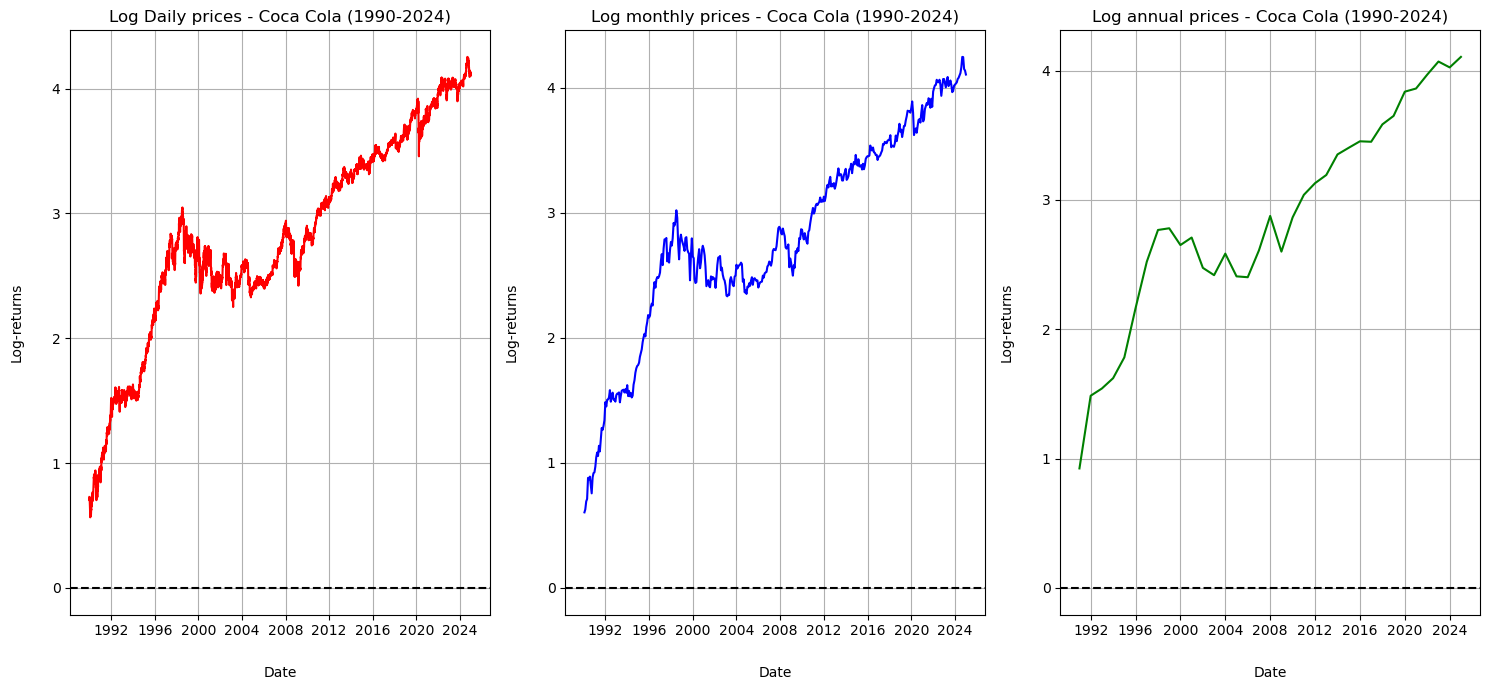

In [321]:
# Extract daily log-prices
log_price_daily = np.log(KO['Close'])

# Calculate monthly log-prices
log_price_monthly = np.log(KO['Close']).resample('ME').last().squeeze()

# Calculate annual Log_prices
annual_log_price = np.log(KO['Close']).resample('YE').last().squeeze() # Resample data to annual frequency

fig, axs = plt.subplots(1,3, figsize=(15, 7))

axs[0].plot(log_price_daily.index,log_price_daily , color='red')
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_title('Log Daily prices - Coca Cola (1990-2024)')
axs[0].set_xlabel('Date',labelpad=20)
axs[0].set_ylabel('Log-returns', rotation=90, labelpad=20)
axs[0].grid(True)


axs[1].plot(log_price_monthly.index, log_price_monthly, color='blue')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_title('Log monthly prices - Coca Cola (1990-2024)')
axs[1].set_xlabel('Date',labelpad=20)
axs[1].set_ylabel('Log-returns', rotation=90, labelpad=20)
axs[1].grid(True)

axs[2].plot(annual_log_price.index, annual_log_price, color='green')
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].set_title('Log annual prices - Coca Cola (1990-2024)')
axs[2].set_xlabel('Date',labelpad=20)
axs[2].set_ylabel('Log-returns', rotation=90, labelpad=20)
axs[2].grid(True)


plt.tight_layout()
plt.show()



# PRELIMINARY STEP 2

# NOTE: log_rt = rt(log-returns)

Compute log-returns for the 3 frequencies (daily, monthly, annual)

In [346]:
#extraction of log returns for the different frquencies (daily, monthly, anually)

import scipy.stats as stats
import seaborn as sns

## we decided to use the adjusted closing price at time t as the value of Pt

KO = yf.download("KO", start="1989-12-31", end="2024-12-31")

# Extract daily log returns (log_rt_dy = log_returns daily)
log_price_daily = np.log(KO['Close'])
log_rt_dy = log_price_daily.diff().dropna().squeeze()# dropna removes the first NaN

# Calculate monthly log-returns (log_returns_monthly = log_rt_m)
log_price_monthly = np.log(KO['Close']).resample('ME').last().squeeze()
log_rt_m = log_price_monthly.diff().dropna().squeeze()

# Calculate annual Log-returns (remove the first obs which is a NaN) (log_returns_annual = log_rt_y)
annual_log_price = np.log(KO['Close']).resample('YE').last().squeeze() # Resample data to annual frequency
log_rt_y = annual_log_price.diff().dropna().squeeze()

C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\3880499076.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  KO = yf.download("KO", start="1989-12-31", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


plot the graph for daily log-returns

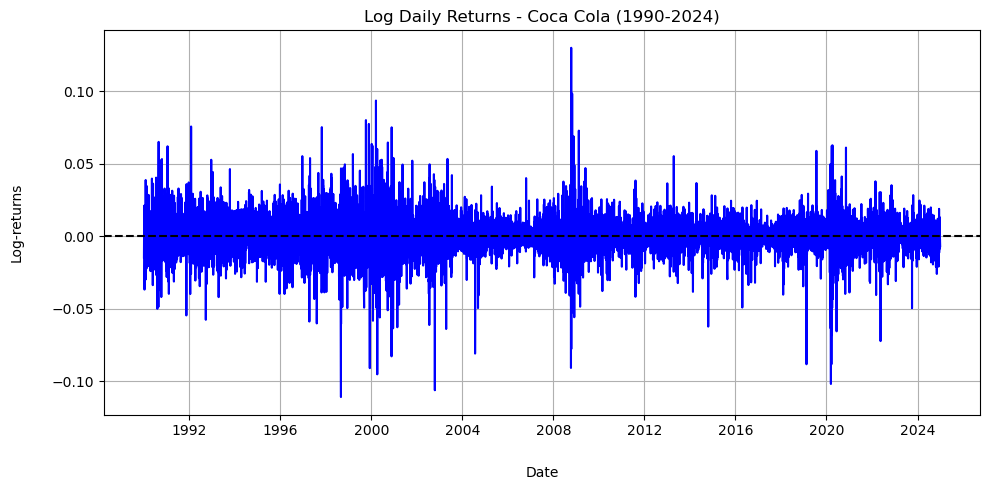

In [274]:
# log returns graphics (different frequencies)

# Daily log-returns
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(log_rt_dy.index, log_rt_dy, color='blue')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_title('Log Daily Returns - Coca Cola (1990-2024)')
ax.set_xlabel('Date',labelpad=20)
ax.set_ylabel('Log-returns', rotation=90, labelpad=20)
ax.grid(True)

plt.tight_layout()
plt.show()


compute and plot the graphs for daily squared log-returns

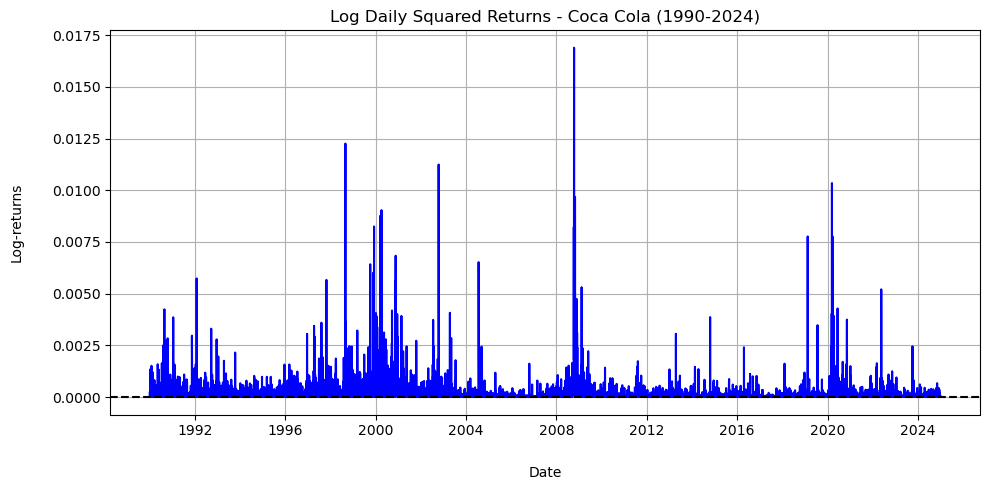

In [275]:
# squared daily log returns

log_rt_squared_dy = (log_price_daily.diff().dropna().squeeze())**2
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(log_rt_squared_dy.index, log_rt_squared_dy, color='blue')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_title('Log Daily Squared Returns - Coca Cola (1990-2024)')
ax.set_xlabel('Date',labelpad=20)
ax.set_ylabel('Log-returns', rotation=90, labelpad=20)
ax.grid(True)

plt.tight_layout()
plt.show()

plot the graphs for monthly and annual log-returns

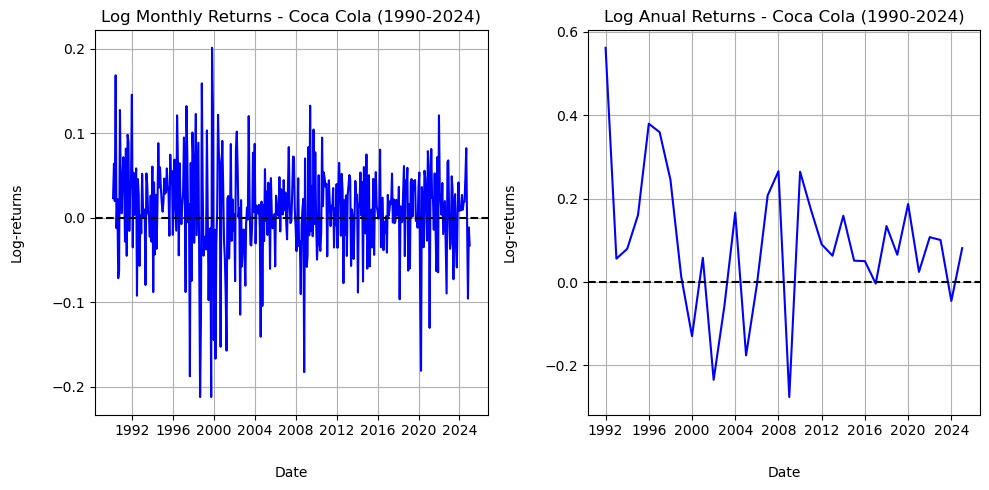

In [313]:

fig, axs = plt.subplots(1,2, figsize=(10, 5))
# Monthly log-returns
axs[0].plot(log_rt_m.index, log_rt_m, color='blue')
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_title('Log Monthly Returns - Coca Cola (1990-2024)')
axs[0].set_xlabel('Date',labelpad=20)
axs[0].set_ylabel('Log-returns', rotation=90, labelpad=20)
axs[0].grid(True)

# Anual log-returns
axs[1].plot(log_rt_y.index, log_rt_y, color='blue')
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_title('Log Anual Returns - Coca Cola (1990-2024)')
axs[1].set_xlabel('Date',labelpad=20)
axs[1].set_ylabel('Log-returns', rotation=90, labelpad=20)
axs[1].grid(True)

plt.tight_layout()
plt.show()

plot the graphs for monthly log-returns

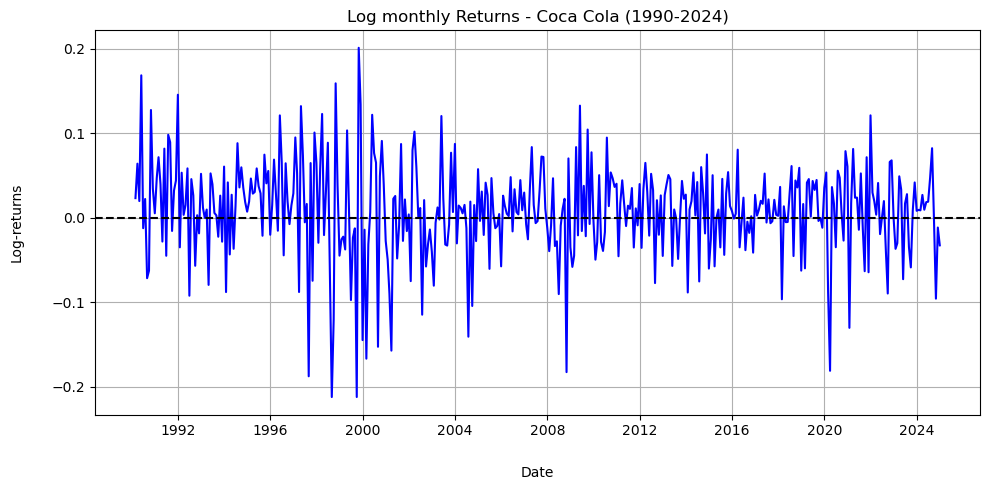

In [316]:
# Monthly log-returns
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(log_rt_m.index, log_rt_m, color='blue')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_title('Log monthly Returns - Coca Cola (1990-2024)')
ax.set_xlabel('Date',labelpad=20)
ax.set_ylabel('Log-returns', rotation=90, labelpad=20)
ax.grid(True)

plt.tight_layout()
plt.show()

plot the graphs for annual log-returns

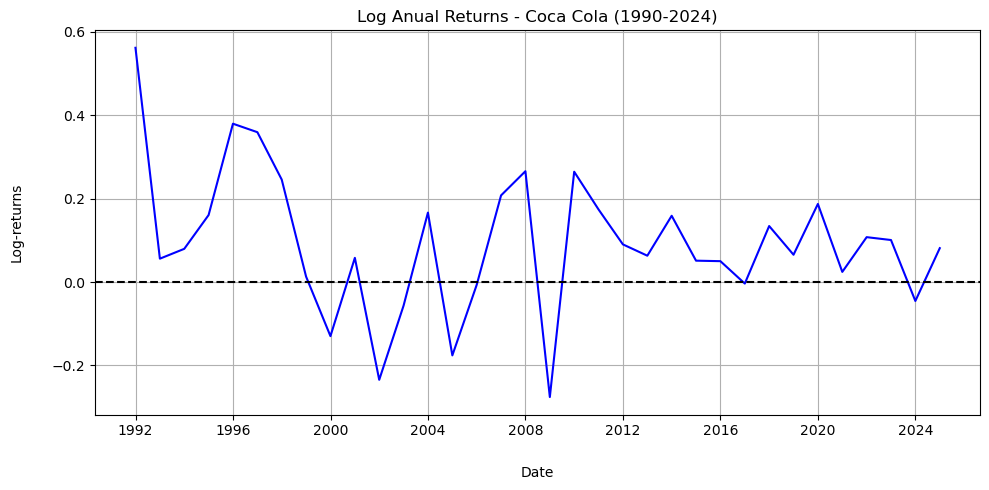

In [317]:
# Anual log-returns
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(log_rt_y.index, log_rt_y, color='blue')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_title('Log Anual Returns - Coca Cola (1990-2024)')
ax.set_xlabel('Date',labelpad=20)
ax.set_ylabel('Log-returns', rotation=90, labelpad=20)
ax.grid(True)

plt.tight_layout()
plt.show()


In [349]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.stats.diagnostic import lilliefors

# Dictionary of log return series
X = {
    'daily': log_rt_dy,
    'monthly': log_rt_m,
    'annual': log_rt_y
}

# Define statistics function
def multi_fun(x):
    x = x.dropna().values  # ensure numpy array
    n = len(x)
    stat_tab = {
        'Mean':  round(np.mean(x) * 100,5),
        'St.Deviation':  round(np.std(x) * 100,5),
        'Diameter.C.I.Mean':  round(1.96 * np.sqrt(np.var(x) / n) * 100,5),
        'Skewness':  round(skew(x),5),
        'Kurtosis':  round(kurtosis(x, fisher = False),5),
        'Excess.Kurtosis':  round(kurtosis(x, fisher = False) - 3,5),
        'Min':  round(np.min(x) * 100,5),
        'Quant5':  round(np.quantile(x, 0.05) * 100,5),
        'Quant25':  round(np.quantile(x, 0.25) * 100,5),
        'Median':  round(np.quantile(x, 0.50) * 100,5),
        'Quant75':  round(np.quantile(x, 0.75) * 100,5),
        'Quant95':  round(np.quantile(x, 0.95) * 100,5),
        'Max':  round(np.max(x) * 100,5),
        'Jarque.Bera.stat':  round(jarque_bera(x)[0],5),
        'Jarque.Bera.pvalue.X100':  round(jarque_bera(x)[1]*100,5),
        'Lillie.test.stat': round(lilliefors(x)[0],5),
        'Lillie.test.pvalue.X100': round(lilliefors(x)[1] * 100,5),
        'N.obs': len(x)
    }
    return stat_tab
    


In [350]:

statistics_dict = {}

# Apply function to each frequency
statistics_dict = {
    key: multi_fun(data.iloc[0:]) 
    for key, data in X.items()
}
# apply multi_fun to each returns ("series" in pandas) 
# which is located in one of the four key of our dictionary X 

# Create a Data Frame
statistics_df = pd.DataFrame(statistics_dict)

# print
print(statistics_df)
        

                               daily    monthly    annual
Mean                         0.03831    0.83557   9.35745
St.Deviation                 1.37560    5.67471  16.67833
Diameter.C.I.Mean            0.02872    0.54337   5.60621
Skewness                    -0.11081   -0.56863   0.23457
Kurtosis                     9.71775    4.92982   3.85851
Excess.Kurtosis              6.71775    1.92982   0.85851
Min                        -11.07207  -21.19491 -27.57396
Quant5                      -2.06990   -8.83871 -19.63347
Quant25                     -0.61724   -2.08721   1.59276
Median                       0.03268    1.18047   8.05133
Quant75                      0.70104    4.18953  17.22409
Quant95                      2.10863    8.95876  36.65928
Max                         12.99706   20.11425  56.18705
Jarque.Bera.stat         16593.21431   87.59788   1.35594
Jarque.Bera.pvalue.X100      0.00000    0.00000  50.76457
Lillie.test.stat             0.06803    0.06279   0.10460
Lillie.test.pv

# Question 1


Does the time series you have downloaded following the preliminary steps present features in
line with the seven Stylized Facts of financial returns discussed in ``Lecture 1: Financial Returns:
Description and Stylized Facts’’ (that is from stylized facts n. 2 to n. 8, excluding stylized fact
1 which is related to non-stationarity of prices)?
Explain carefully your answer for each of the seven stylized facts of financial returns by using
additional computations, tables and graphs done/generated using the software Python and the
data you have downloaded/computed following the two preliminary steps. You are free to decide
the right mix of tables, graphs, formulas and comments needed to answer this question

# stylized fact 2: (log-returns) returns stationary
We use graphics of log returns daily, monthly, anual log-returns and daily squared log-returns




we use the table (cf preliminary 2) 
# stylized fact 3: (log-returns) returns asymetrics)	Returns are asymmetric: negative skewness


Here we use the table, especially skewness values generated in the table (preliminary 2)

# Stilized fact 4 

plot histograms for daily, monthly and annual log-returns

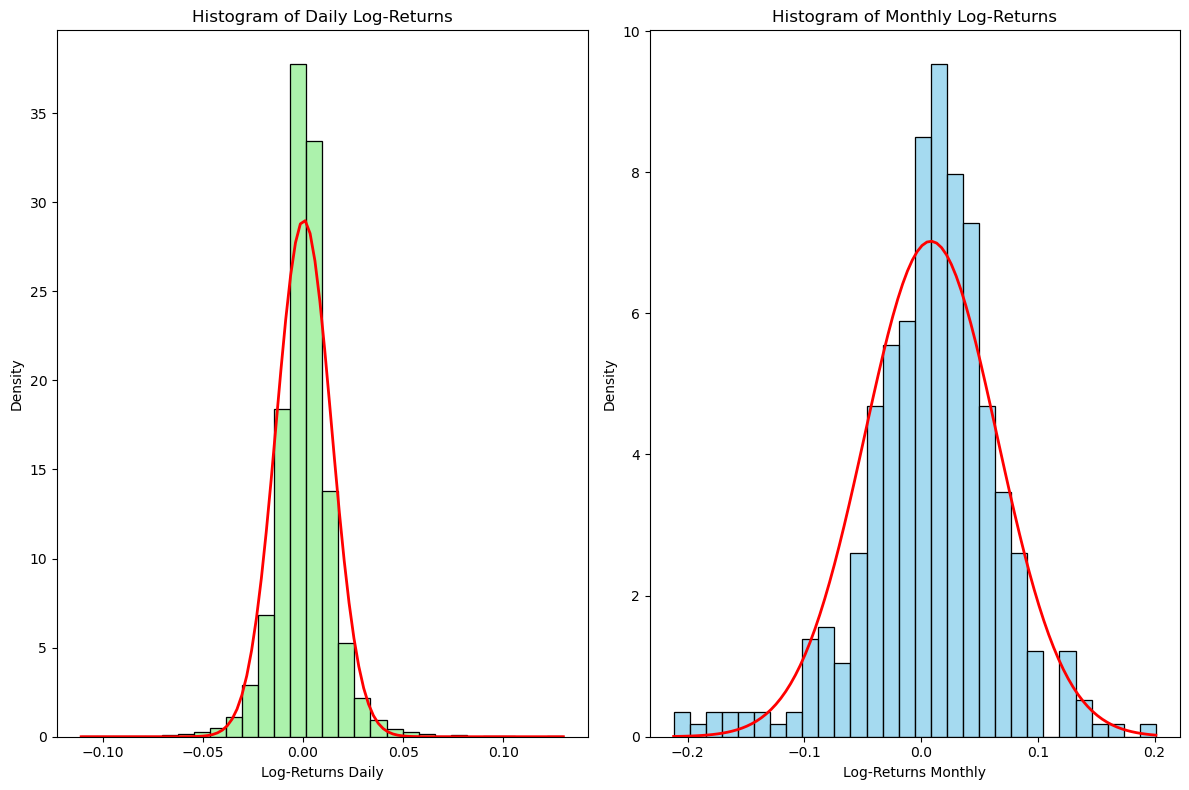

In [276]:
# stilized fact 4 : Returns have heavy tails: large positive excess kurtosis

import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Create log returns histograms for the 3 frequencies

# Create the figure with four subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot histogram of daily log-returns
sns.histplot(log_rt_dy, bins=30, color='lightgreen', edgecolor='black', kde_kws={'color': 'red'}, ax=axs[0], stat='density')
edgecolor=None
axs[0].plot(np.linspace(log_rt_dy.min(), log_rt_dy.max(), 100),
               stats.norm.pdf(np.linspace(log_rt_dy.min(), log_rt_dy.max(), 100),
                             log_rt_dy.mean(), log_rt_dy.std()), color='red', linewidth=2)
axs[0].set_title('Histogram of Daily Log-Returns')
axs[0].set_xlabel('Log-Returns Daily')
axs[0].set_ylabel('Density')

# Plot histogram of monthly log-returns
sns.histplot(log_rt_m, bins=30, color='skyblue', edgecolor='black', kde_kws={'color': 'red'}, ax=axs[1], stat='density')
edgecolor=None
axs[1].plot(np.linspace(log_rt_m.min(), log_rt_m.max(), 100),
               stats.norm.pdf(np.linspace(log_rt_m.min(), log_rt_m.max(), 100),
                              log_rt_m.mean(), log_rt_m.std()), color='red', linewidth=2)
axs[1].set_title('Histogram of Monthly Log-Returns')
axs[1].set_xlabel('Log-Returns Monthly')
axs[1].set_ylabel('Density')

# Adjust spacing between plots
plt.tight_layout()

# plot graphic
plt.show()

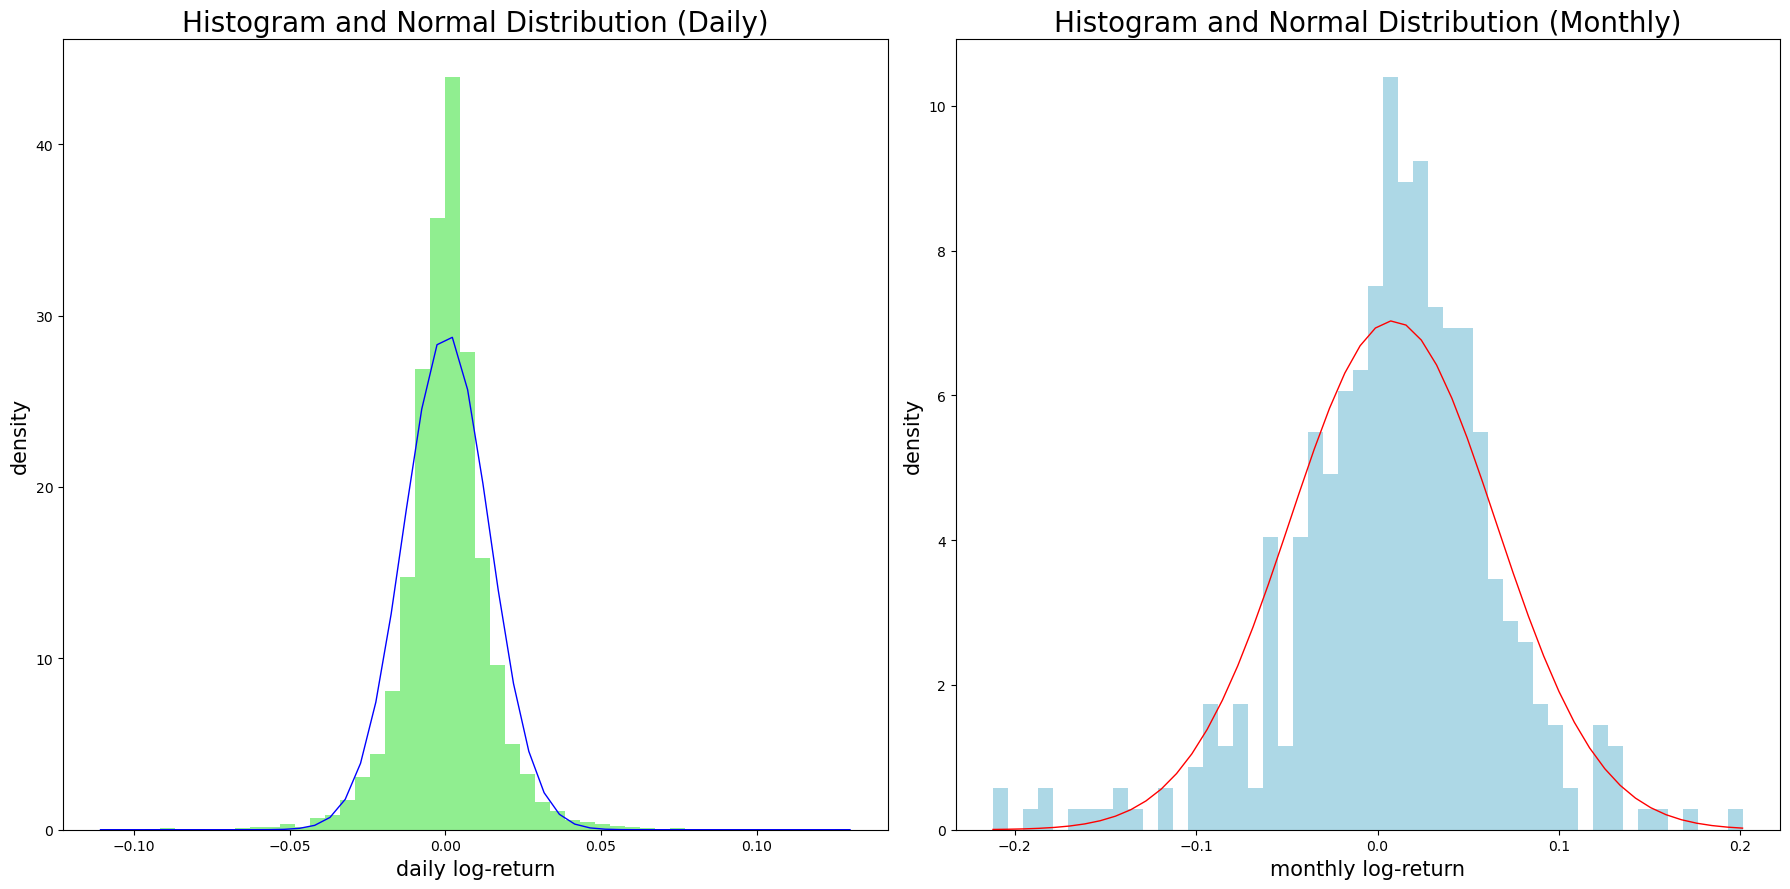

In [108]:
# Ohter version with different features (only daily, monthly log returns)

# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

# Histogram and Normal Distribution (Daily)
axs[0].hist(log_rt_dy, bins=50, density=True, color="lightgreen")
norm_y = stats.norm.pdf(np.linspace(log_rt_dy.min(), log_rt_dy.max()), loc=np.mean(log_rt_dy), scale=np.std(log_rt_dy))
axs[0].plot(np.linspace(log_rt_dy.min(), log_rt_dy.max()), norm_y, color="blue", linewidth=1)
axs[0].set_xlabel("daily log-return",size=15)
axs[0].set_ylabel("density",size=15)
axs[0].set_title("Histogram and Normal Distribution (Daily)",size=20)

# Histogram and Normal Distribution (Monthly)
axs[1].hist(log_rt_m, bins=50, density=True, color="lightblue")
norm_y = stats.norm.pdf(np.linspace(log_rt_m.min(), log_rt_m.max()), loc=np.mean(log_rt_m), scale=np.std(log_rt_m))
axs[1].plot(np.linspace(log_rt_m.min(), log_rt_m.max()), norm_y, color="red", linewidth=1)
axs[1].set_xlabel("monthly log-return",size=15)
axs[1].set_ylabel("density",size=15)
axs[1].set_title("Histogram and Normal Distribution (Monthly)",size=20)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

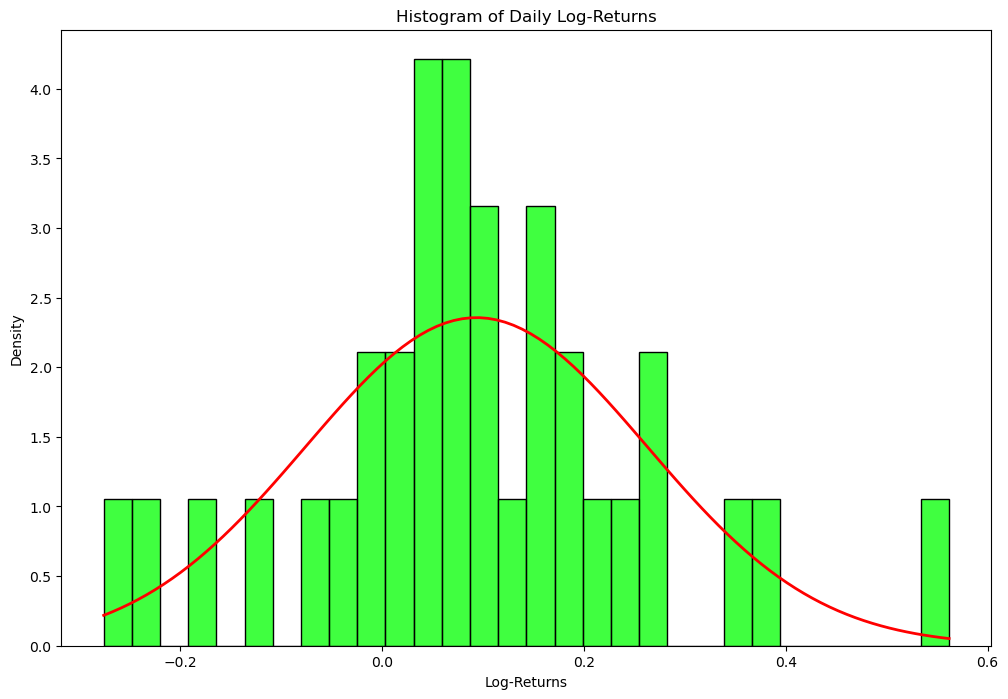

In [72]:
# Plot histogram of anual log-returns

fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(log_rt_y, bins=30, color='lime', edgecolor='black', kde_kws={'color': 'red'}, stat='density')
ax.plot(np.linspace(log_rt_y.min(), log_rt_y.max(), 100),
               stats.norm.pdf(np.linspace(log_rt_y.min(), log_rt_y.max(), 100),
                             log_rt_y.mean(), log_rt_y.std()), color='red', linewidth=2)
ax.set_title('Histogram of Daily Log-Returns')
ax.set_xlabel('Log-Returns')
ax.set_ylabel('Density')
plt.show()


plot QQ plot for daily, monthly and annual log-returns

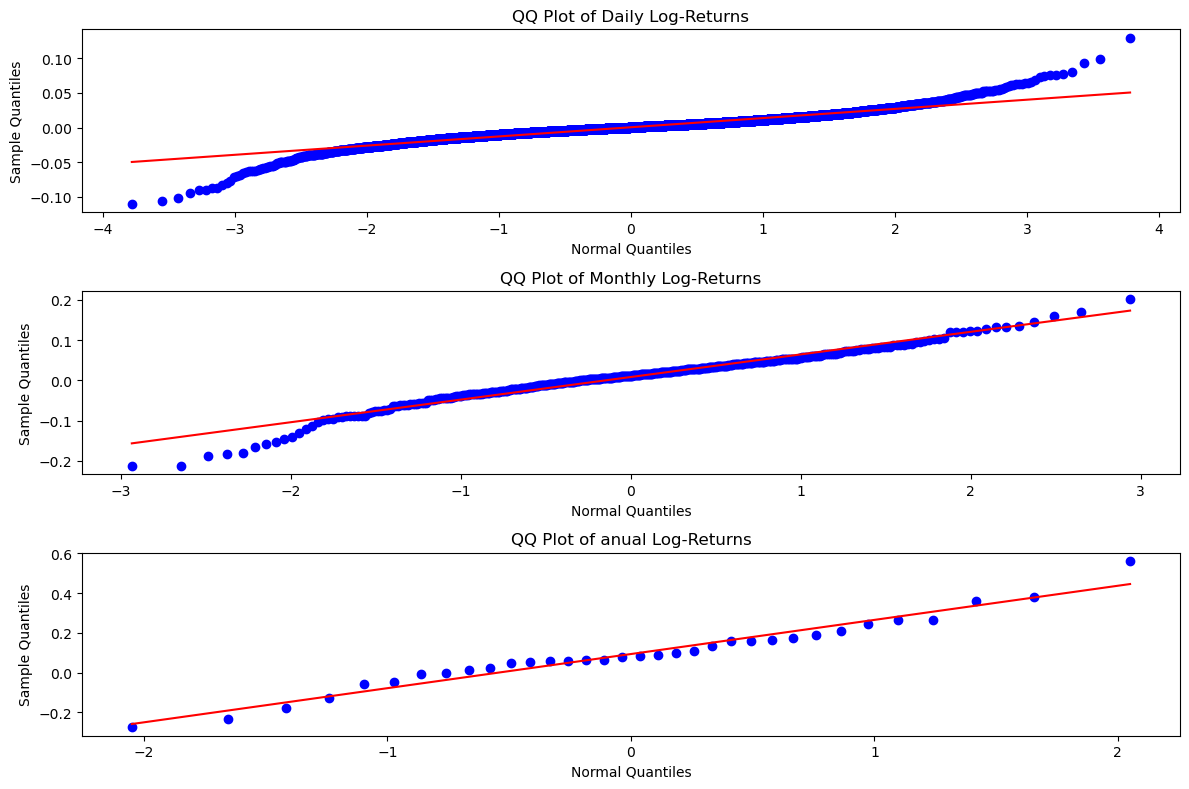

In [353]:
# Create QQ plot of daily, monthly and anual log returns 


fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# QQ plot of daily log-returns
qqplot_axes = stats.probplot(log_rt_dy, dist="norm", plot=axs[0])
axs[0].set_title('QQ Plot of Daily Log-Returns')
axs[0].set_xlabel('Normal Quantiles')
axs[0].set_ylabel('Sample Quantiles')

# QQ plot of monthly log-returns
qqplot_axes = stats.probplot(log_rt_m, dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot of Monthly Log-Returns')
axs[1].set_xlabel('Normal Quantiles')
axs[1].set_ylabel('Sample Quantiles')

# QQ plot of anual log-returns
qqplot_axes = stats.probplot(log_rt_y, dist="norm", plot=axs[2])
axs[2].set_title('QQ Plot of anual Log-Returns')
axs[2].set_xlabel('Normal Quantiles')
axs[2].set_ylabel('Sample Quantiles')

# Adjust spacing between plots
plt.tight_layout()

plt.show()

# Stilized fact 5

We use the table from preliminary 2 especially Jarque Bera and Lillies test statistics and p-values

# Stilized fact 6

plot ACF for daily,monthly and annual log-returns

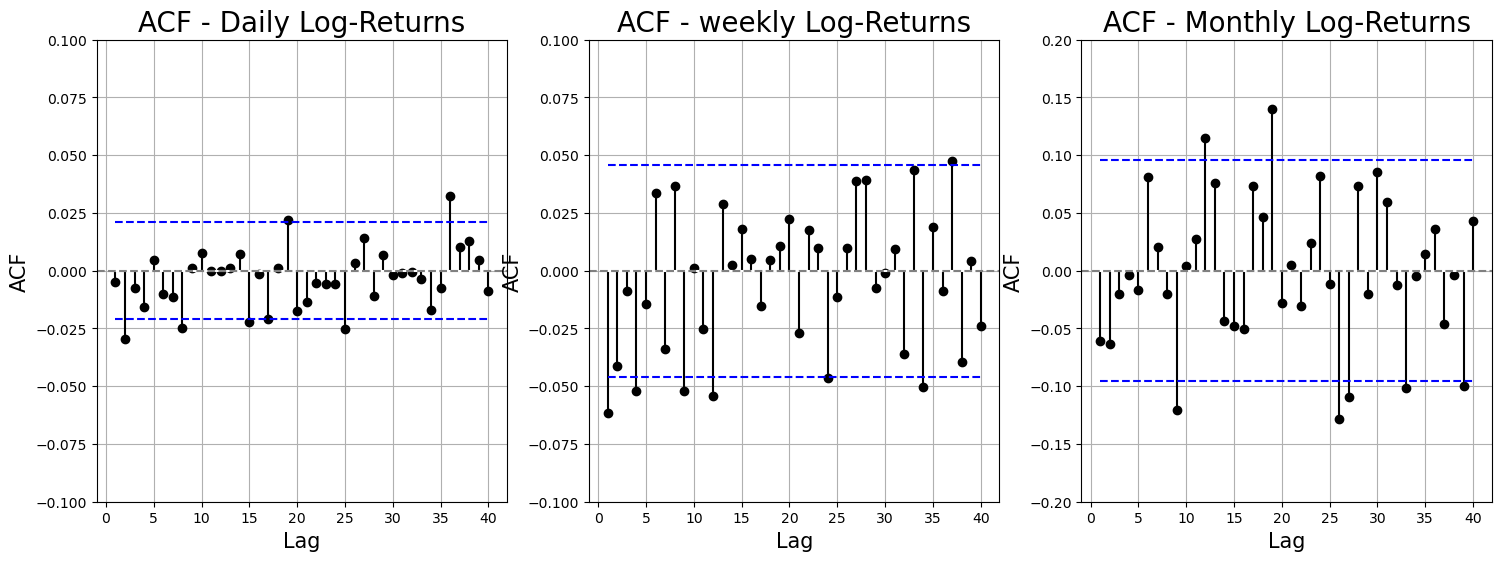

<Figure size 640x480 with 0 Axes>

In [294]:
#stilized fact 6 : Returns are not autocorrelated

from statsmodels.tsa.stattools import acf
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Compute the empirical ACF
lags = 40 # we chose a level of lag that takes into consideration enough observations,so that the interpretation is relevant, for the 3 frequencies
acf_values_daily = acf(log_rt_dy, nlags=lags)

# Compute the bartlet intervals
confint = 1.96 / np.sqrt(len(log_rt_dy))
confint_upper = np.full(lags, confint)
confint_lower = -np.full(lags, confint)

# Set the layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# ACF of daily log-returns
axs[0].stem(np.arange(1, lags + 1), acf_values_daily[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0].axhline(y=0, color='gray', linestyle='--')
axs[0].plot(np.arange(1, lags + 1), confint_upper, color='blue', linestyle='dashed')
axs[0].plot(np.arange(1, lags + 1), confint_lower, color='blue', linestyle='dashed')
axs[0].set_ylim(-0.1, 0.1)
axs[0].set_title('ACF - Daily Log-Returns',size=20)
axs[0].set_xlabel('Lag',size=15)
axs[0].set_ylabel('ACF',size=15)
axs[0].grid(True)

# ACF of monthly log-returns
acf_values_monthly = acf(log_rt_m, nlags=lags)
confint_monthly = 1.96 / np.sqrt(len(log_rt_m))
confint_monthly_upper = np.full(lags, confint_monthly)
confint_monthly_lower = -np.full(lags, confint_monthly)

axs[2].stem(np.arange(1, lags + 1), acf_values_monthly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[2].axhline(y=0, color='gray', linestyle='--')
axs[2].plot(np.arange(1, lags + 1), confint_monthly_upper, color='blue', linestyle='dashed')
axs[2].plot(np.arange(1, lags + 1), confint_monthly_lower, color='blue', linestyle='dashed')
axs[2].set_ylim(-0.2, 0.2)
axs[2].set_title('ACF - Monthly Log-Returns',size=20)
axs[2].set_xlabel('Lag',size=15)
axs[2].set_ylabel('ACF',size=15)
axs[2].grid(True)

#weekly
# Get weekly log-returns :"Using weekly data is more appropriate than using because it smooths out daily market microstructure noise while still retaining enough observations to estimate autocorrelations reliably
log_rt_w = np.log(KO['Close']).resample('W').last().diff().dropna().squeeze()

# ACF of weekly log-returns
acf_values_weekly = acf(log_rt_w, nlags=lags)
confint_weekly = 1.96 / np.sqrt(len(log_rt_w))
confint_weekly_upper = np.full(lags, confint_weekly)
confint_weekly_lower = -np.full(lags, confint_weekly)

axs[1].stem(np.arange(1, lags + 1), acf_values_weekly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_upper, color='blue', linestyle='dashed')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_lower, color='blue', linestyle='dashed')
axs[1].set_ylim(-0.1, 0.1)
axs[1].set_title('ACF - weekly Log-Returns',size=20)
axs[1].set_xlabel('Lag',size=15)
axs[1].set_ylabel('ACF',size=15)
axs[1].grid(True)

#show
plt.show()
# Set the space
plt.tight_layout()


#show
plt.show()

perform Ljung-box test for lag 1 for daily and monthly log-retuns

In [191]:
#Ljung-Box test: Box-Pierce and Ljung-Box tests of (daily and monthly)log-returns:: lag = 1

import statsmodels.api as sm
# daily
lbbp_test_log_rt_dy = sm.stats.acorr_ljungbox(log_rt_dy, lags=[1], boxpierce=True)
bp_stat_dy = lbbp_test_log_rt_dy['bp_stat'].iloc[0] # .iloc[0] to save only the value
lb_stat_dy = lbbp_test_log_rt_dy['lb_stat'].iloc[0]
bp_pval_dy = lbbp_test_log_rt_dy['bp_pvalue'].iloc[0]
lb_pval_dy = lbbp_test_log_rt_dy['lb_pvalue'].iloc[0]

#monthly
lbbp_test_log_rt_m = sm.stats.acorr_ljungbox(log_rt_m, lags=[1], boxpierce=True)
bp_stat_m = lbbp_test_log_rt_m['bp_stat'].iloc[0] # .iloc[0] to save only the value
lb_stat_m = lbbp_test_log_rt_m['lb_stat'].iloc[0]
bp_pval_m = lbbp_test_log_rt_m['bp_pvalue'].iloc[0]
lb_pval_m = lbbp_test_log_rt_m['lb_pvalue'].iloc[0]

#print

print("Box-Pierce of daily rt, lag=1:","Stat:",round(bp_stat_dy,3),"- p-value:",round(bp_pval_dy,3))
print("Ljung-Box of daily rt, lag=1:","Stat:",round(lb_stat_dy,3),"- p-value:",round(lb_pval_dy,3))

print("Box-Pierce of monthly rt, lag=1:","Stat:",round(bp_stat_m,3),"- p-value:",round(bp_pval_m,3))
print("Ljung-Box of monthly rt, lag=1:","Stat:",round(lb_stat_m,3),"- p-value:",round(lb_pval_m,3))


Box-Pierce of daily rt, lag=1: Stat: 0.219 - p-value: 0.64
Ljung-Box of daily rt, lag=1: Stat: 0.219 - p-value: 0.64
Box-Pierce of monthly rt, lag=1: Stat: 1.553 - p-value: 0.213
Ljung-Box of monthly rt, lag=1: Stat: 1.564 - p-value: 0.211


perform Ljung-box test for lag 15 for daily and monthly log-retuns

In [219]:
#Ljung-Box test: Box-Pierce and Ljung-Box tests of (daily and monthly)log-returns:: lag = 15

import statsmodels.api as sm
# daily
lbbp_test_log_rt_dy_15 = sm.stats.acorr_ljungbox(log_rt_dy, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], boxpierce=True)
bp_stat15_dy = lbbp_test_log_rt_dy_15['bp_stat'].iloc[-1] # .iloc[0] to save only the value
lb_stat15_dy = lbbp_test_log_rt_dy_15['lb_stat'].iloc[-1]
bp_pval15_dy = lbbp_test_log_rt_dy_15['bp_pvalue'].iloc[-1]
lb_pval15_dy = lbbp_test_log_rt_dy_15['lb_pvalue'].iloc[-1]

#monthly
lbbp_test_log_rt_m_15 = sm.stats.acorr_ljungbox(log_rt_m, lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], boxpierce=True)
bp_stat15_m = lbbp_test_log_rt_m_15['bp_stat'].iloc[-1] # .iloc[0] to save only the value
lb_stat15_m = lbbp_test_log_rt_m_15['lb_stat'].iloc[-1]
bp_pval15_m = lbbp_test_log_rt_m_15['bp_pvalue'].iloc[-1]
lb_pval15_m = lbbp_test_log_rt_m_15['lb_pvalue'].iloc[-1]

#print

print("Box-Pierce of daily rt, lag=15:","Stat:",round(bp_stat15_dy,3),"- p-value:",round(bp_pval15_dy,3))
print("Ljung-Box of daily rt, lag=15:","Stat:",round(lb_stat15_dy,3),"- p-value:",round(lb_pval15_dy,3))

print("Box-Pierce of monthly rt, lag=15:","Stat:",round(bp_stat15_m,3),"- p-value:",round(bp_pval15_m,3))
print("Ljung-Box of monthly rt, lag=15:","Stat:",round(lb_stat15_m,3),"- p-value:",round(lb_pval15_m,3))

Box-Pierce of daily rt, lag=15: Stat: 23.57 - p-value: 0.073
Ljung-Box of daily rt, lag=15: Stat: 23.594 - p-value: 0.072
Box-Pierce of monthly rt, lag=15: Stat: 22.743 - p-value: 0.09
Ljung-Box of monthly rt, lag=15: Stat: 23.36 - p-value: 0.077


perform Ljung-box test for lag 5 for daily and monthly log-retuns

In [192]:
# Ljung-Box test: Box-Pierce and Ljung-Box tests of (daily and monthly) log-returns:: lag = 5

#daily
lbbp_test_log_rt_dy_5 = sm.stats.acorr_ljungbox(log_rt_dy, lags=[1, 2, 3, 4, 5], boxpierce=True)
bp_stat5_dy = lbbp_test_log_rt_dy_5['bp_stat'].iloc[-1] # .iloc[0] to save only the value
lb_stat5_dy = lbbp_test_log_rt_dy_5['lb_stat'].iloc[-1]
bp_pval5_dy = lbbp_test_log_rt_dy_5['bp_pvalue'].iloc[-1]
lb_pval5_dy = lbbp_test_log_rt_dy_5['lb_pvalue'].iloc[-1]

#monthly
#monthly
lbbp_test_log_rt_m_5 = sm.stats.acorr_ljungbox(log_rt_m, lags=[1, 2, 3, 4, 5], boxpierce=True)
bp_stat5_m = lbbp_test_log_rt_m_5['bp_stat'].iloc[-1] # .iloc[0] to save only the value
lb_stat5_m = lbbp_test_log_rt_m_5['lb_stat'].iloc[-1]
bp_pval5_m = lbbp_test_log_rt_m_5['bp_pvalue'].iloc[-1]
lb_pval5_m = lbbp_test_log_rt_m_5['lb_pvalue'].iloc[-1]

# print
print("Box-Pierce of daily rt, lag=5:","Stat:",round(bp_stat5_dy,3),"- p-value:",round(bp_pval5_dy,3))
print("Ljung-Box of daily rt, lag=5:","Stat:",round(lb_stat5_dy,3),"- p-value:",round(lb_pval5_dy,3))

print("Box-Pierce of monthly rt, lag=5:","Stat:",round(bp_stat5_m,3),"- p-value:",round(bp_pval5_m,3))
print("Ljung-Box of monthly rt, lag=5:","Stat:",round(lb_stat5_m,3),"- p-value:",round(lb_pval5_m,3))

Box-Pierce of daily rt, lag=5: Stat: 10.684 - p-value: 0.058
Ljung-Box of daily rt, lag=5: Stat: 10.69 - p-value: 0.058
Box-Pierce of monthly rt, lag=5: Stat: 3.538 - p-value: 0.618
Ljung-Box of monthly rt, lag=5: Stat: 3.57 - p-value: 0.613


summary

In [220]:
# Construct the table for Box-Pierce and Ljung-Box tests of (daily and monthly) log-returns:: lag = 5 and Lag = 15

data = {
    "Daily  Log-Returns": [
        f"p = {round(bp_pval5_dy,4)}",
        f"p = {round(lb_pval5_dy,4)}",
        f"p = {round(bp_pval15_dy,4)}",
        f"p = {round(lb_pval15_dy,4)}"
    ],
    "Monthly Log-Returns": [
        f"p = {round(bp_pval5_m,4)}",
        f"p = {round(lb_pval5_m,4)}",
        f"p = {round(bp_pval15_m,4)}",
        f"p = {round(lb_pval15_m,4)}"
    ]
}

index = [
    "Box-Pierce (lag = 5)",
    "Ljung-Box (lag = 5)",
    "Box-Pierce (lag = 15)",
    "Ljung-Box (lag = 15)"
]

results_table = pd.DataFrame(data, index=index)

print(results_table)

                      Daily  Log-Returns Monthly Log-Returns
Box-Pierce (lag = 5)           p = 0.058          p = 0.6176
Ljung-Box (lag = 5)           p = 0.0579          p = 0.6129
Box-Pierce (lag = 15)         p = 0.0728          p = 0.0898
Ljung-Box (lag = 15)          p = 0.0723          p = 0.0768


# Stilized fact 7

plot ACF of daily, monthly, weekly and annual squared log-returns

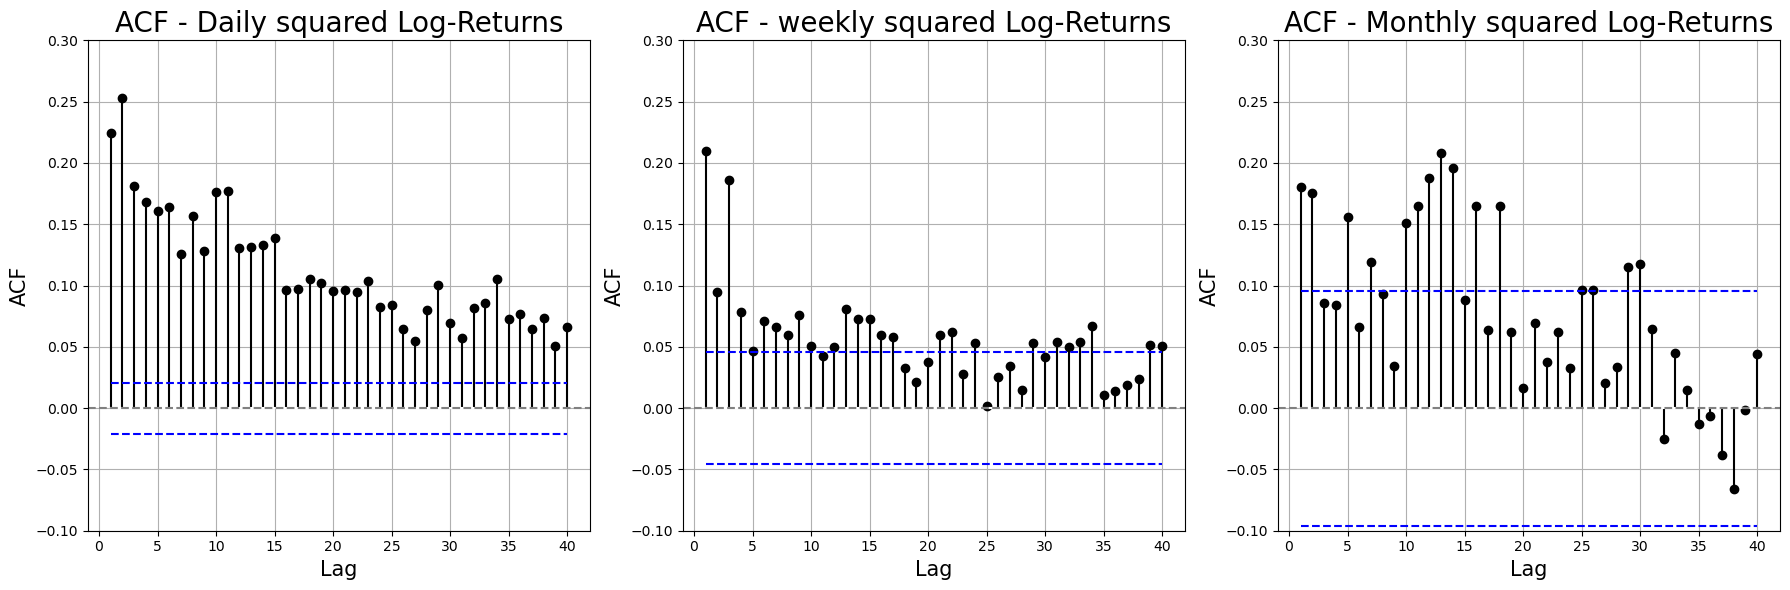

In [298]:
# stilized fact 7: 	Volatility clustering and long range dependence of squared returns
#Time series the squared log returns from the “adjusted closing” of Coca Cola

# compute daily, monthly, anual squared log-returns

# daily squared log-returns
log_squared_rt_dy = log_rt_dy**2

# monthly squared log-returns
log_squared_rt_m = log_rt_m**2

# weekly squared log-returns
log_squared_rt_w = log_rt_w**2


# Compute the empirical ACF
lags = 40
acf_values_daily = acf(log_squared_rt_dy, nlags=lags)

# Compute the bartlet intervals
confint = 1.96 / np.sqrt(len(log_squared_rt_dy)) #METTRE LOG_SQUARED_RT_DY ?
confint_upper = np.full(lags, confint)
confint_lower = -np.full(lags, confint)

# Set the layout
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# ACF of squared daily log-returns
axs[0].stem(np.arange(1, lags + 1), acf_values_daily[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0].axhline(y=0, color='gray', linestyle='--')
axs[0].plot(np.arange(1, lags + 1), confint_upper, color='blue', linestyle='dashed')
axs[0].plot(np.arange(1, lags + 1), confint_lower, color='blue', linestyle='dashed')
axs[0].set_ylim(-0.1, 0.3)
axs[0].set_title('ACF - Daily squared Log-Returns',size=20)
axs[0].set_xlabel('Lag',size=15)
axs[0].set_ylabel('ACF',size=15)
axs[0].grid(True)

# ACF of squared monthly log-returns
acf_values_monthly = acf(log_squared_rt_m, nlags=lags)
confint_monthly = 1.96 / np.sqrt(len(log_squared_rt_m))
confint_monthly_upper = np.full(lags, confint_monthly)
confint_monthly_lower = -np.full(lags, confint_monthly)

axs[2].stem(np.arange(1, lags + 1), acf_values_monthly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[2].axhline(y=0, color='gray', linestyle='--')
axs[2].plot(np.arange(1, lags + 1), confint_monthly_upper, color='blue', linestyle='dashed')
axs[2].plot(np.arange(1, lags + 1), confint_monthly_lower, color='blue', linestyle='dashed')
axs[2].set_ylim(-0.1, 0.3)
axs[2].set_title('ACF - Monthly squared Log-Returns',size=20)
axs[2].set_xlabel('Lag',size=15)
axs[2].set_ylabel('ACF',size=15)
axs[2].grid(True)

# ACF of weekly log-returns
acf_values_weekly = acf(log_squared_rt_w, nlags=lags)
confint_weekly = 1.96 / np.sqrt(len(log_squared_rt_w))
confint_weekly_upper = np.full(lags, confint_weekly)
confint_weekly_lower = -np.full(lags, confint_weekly)

axs[1].stem(np.arange(1, lags + 1), acf_values_weekly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_upper, color='blue', linestyle='dashed')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_lower, color='blue', linestyle='dashed')
axs[1].set_ylim(-0.1, 0.3)
axs[1].set_title('ACF - weekly squared Log-Returns',size=20)
axs[1].set_xlabel('Lag',size=15)
axs[1].set_ylabel('ACF',size=15)
axs[1].grid(True)

# Set the space
plt.tight_layout()


#show
plt.show()




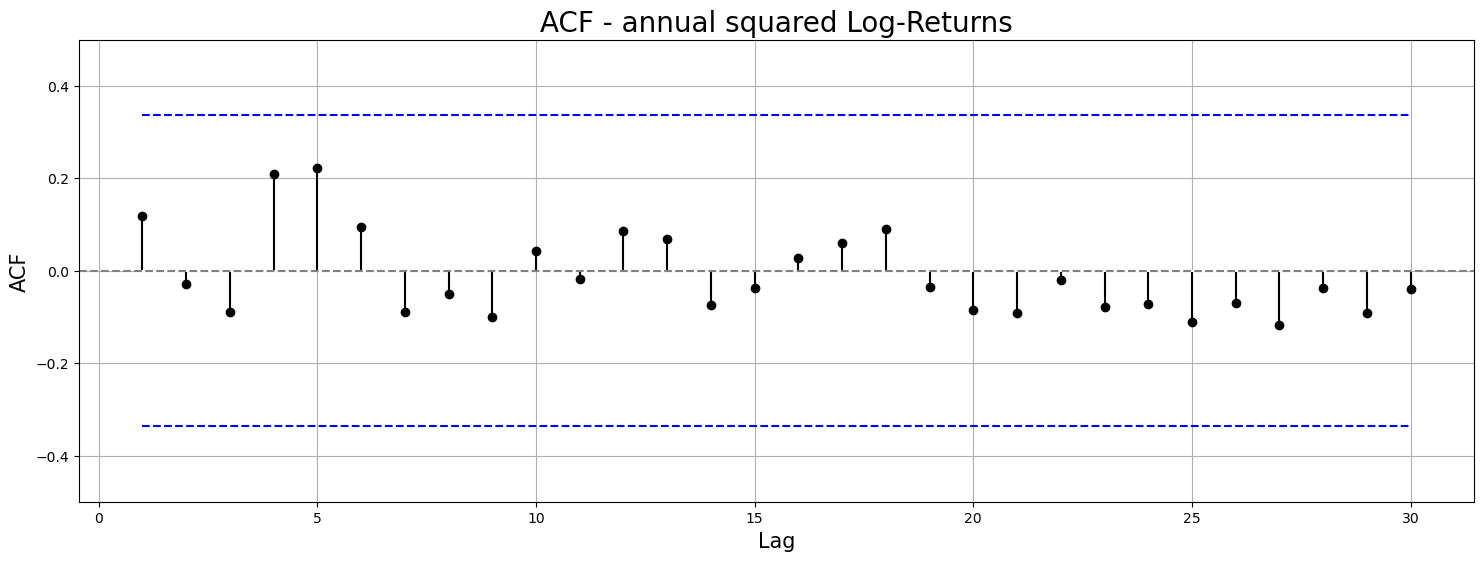

In [299]:
# Compute the empirical ACF 
lags = 30

# Set the layout
fig, ax = plt.subplots(figsize=(18, 6))
log_squared_rt_y = (log_rt_y)**2
# ACF of annual log-returns
acf_values_annual = acf(log_squared_rt_y, nlags=lags)
confint_annual = 1.96 / np.sqrt(len(log_squared_rt_y))
confint_annual_upper = np.full(lags, confint_annual)
confint_annual_lower = -np.full(lags, confint_annual)

ax.stem(np.arange(1, lags + 1), acf_values_annual[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
ax.axhline(y=0, color='gray', linestyle='--')
ax.plot(np.arange(1, lags + 1), confint_annual_upper, color='blue', linestyle='dashed')
ax.plot(np.arange(1, lags + 1), confint_annual_lower, color='blue', linestyle='dashed')
ax.set_ylim(-0.5, 0.5)
ax.set_title('ACF - annual squared Log-Returns',size=20)
ax.set_xlabel('Lag',size=15)
ax.set_ylabel('ACF',size=15)
ax.grid(True)

#show
plt.show()

plot rolling SD deviation (daily log-returns)

C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\1033585389.py:25: RuntimeWarning: divide by zero encountered in divide
  sd_plot_ub = roll_mom_manual[:,1]+1.96*(1/(2*sd_plot)*np.sqrt(mu4-sd_plot**4))/np.sqrt(window_length)
C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\1033585389.py:25: RuntimeWarning: invalid value encountered in multiply
  sd_plot_ub = roll_mom_manual[:,1]+1.96*(1/(2*sd_plot)*np.sqrt(mu4-sd_plot**4))/np.sqrt(window_length)
C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\1033585389.py:26: RuntimeWarning: divide by zero encountered in divide
  sd_plot_lb = roll_mom_manual[:,1]-1.96*(1/(2*sd_plot)*np.sqrt(mu4-sd_plot**4))/np.sqrt(window_length)
C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\1033585389.py:26: RuntimeWarning: invalid value encountered in multiply
  sd_plot_lb = roll_mom_manual[:,1]-1.96*(1/(2*sd_plot)*np.sqrt(mu4-sd_plot**4))/np.sqrt(window_length)


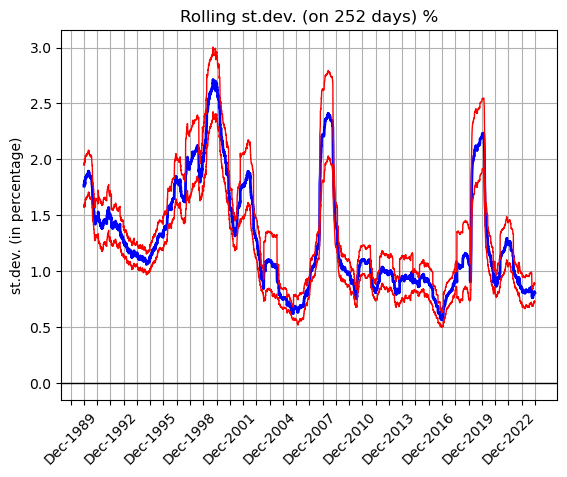

In [125]:
# rolling SD deviation 

# set the rolling window equal to 252 days
window_length = 252
T = log_rt_dy.shape[0]

# Create an empty matrix to store data
roll_mom_manual = np.zeros((T, 5))

# Run a for loop to fill the matrix with moments
for i in range(window_length, T):
    est_window = np.arange(i - window_length + 1, i + 1)
    y = log_rt_dy.iloc[est_window]
    
    # compute the moments for each 
    roll_mom_manual[i, 0] = np.mean(y)
    roll_mom_manual[i, 1] = np.std(y, ddof=1)
    roll_mom_manual[i, 2] = skew(y)
    roll_mom_manual[i, 3] = kurtosis(y)
    roll_mom_manual[i, 4] = np.mean((y - np.mean(y))**4)
    
# extract the Std Dev from roll_mom_manual
sd_plot = roll_mom_manual[:,1]
mu4 = roll_mom_manual[:,4]
sd_plot_ub = roll_mom_manual[:,1]+1.96*(1/(2*sd_plot)*np.sqrt(mu4-sd_plot**4))/np.sqrt(window_length)
sd_plot_lb = roll_mom_manual[:,1]-1.96*(1/(2*sd_plot)*np.sqrt(mu4-sd_plot**4))/np.sqrt(window_length)

data2plot_na = np.column_stack((sd_plot, sd_plot_lb, sd_plot_ub))

data_index = log_rt_dy.index

data2plot_na = pd.DataFrame({'StD': sd_plot, 'LowerBound': sd_plot_lb, 'UpperBound': sd_plot_ub},
                               index=data_index)

# Select only rows without missing values
data2plot = data2plot_na.dropna()
# retrieve the data index
data2plot

# Customizing x-axis labels for December 31 of each year
date_labels = pd.date_range(start='1989-12-31', end='2024-12-31', freq='YE-DEC')
# Show 1 tick every 3 years
formatted_labels = [f'Dec-{date.year}' if date.year % 3 == 0 else '' for date in date_labels]
# Add labels and rotate them 
plt.xticks(date_labels, formatted_labels, rotation=45)

# Plot the data
plt.plot(data2plot.index, data2plot["StD"] * 100, color='blue', linestyle='-', linewidth=2)
plt.plot(data2plot.index, data2plot["LowerBound"] * 100, color='red', linestyle='-', linewidth=1)
plt.plot(data2plot.index, data2plot["UpperBound"] * 100, color='red', linestyle='-', linewidth=1)
plt.xlabel('')
plt.grid(True)
plt.ylabel('st.dev. (in percentage)')
plt.title('Rolling st.dev. (on 252 days) %')
plt.axhline(0, linestyle='-', color='black', linewidth=1)  # Add a zero line

plt.show()


In [195]:
#Ljung-Box test: Box-Pierce and Ljung-Box tests of squared (daily and monthly) log-returns: lag = 1

# daily
lbbp_test_log_squared_rt_dy = sm.stats.acorr_ljungbox(log_squared_rt_dy, lags=[1], boxpierce=True)
bp_stat_squared_dy = lbbp_test_log_squared_rt_dy['bp_stat'].iloc[0] # .iloc[0] to save only the value
lb_stat_squared_dy = lbbp_test_log_squared_rt_dy['lb_stat'].iloc[0]
bp_pval_squared_dy = lbbp_test_log_squared_rt_dy['bp_pvalue'].iloc[0]
lb_pval_squared_dy = lbbp_test_log_squared_rt_dy['lb_pvalue'].iloc[0]

#monthly
lbbp_test_log_squared_rt_m = sm.stats.acorr_ljungbox(log_squared_rt_m, lags=[1], boxpierce=True)
bp_stat_squared_m = lbbp_test_log_squared_rt_m['bp_stat'].iloc[0] # .iloc[0] to save only the value
lb_stat_squared_m = lbbp_test_log_squared_rt_m['lb_stat'].iloc[0]
bp_pval_squared_m = lbbp_test_log_squared_rt_m['bp_pvalue'].iloc[0]
lb_pval_squared_m = lbbp_test_log_squared_rt_m['lb_pvalue'].iloc[0]

#print

print("Box-Pierce of squared daily rt, lag=1:","Stat:",round(bp_stat_squared_dy,4),"- p-value:",round(bp_pval_squared_dy,4))
print("Ljung-Box of squared daily rt, lag=1:","Stat:",round(lb_stat_squared_dy,3),"- p-value:",round(lb_pval_squared_dy,3))

print("Box-Pierce of squared monthly rt, lag=1:","Stat:",round(bp_stat_squared_m,4),"- p-value:",round(bp_pval_squared_m,4))
print("Ljung-Box of squared monthly rt, lag=1:","Stat:",round(lb_stat_squared_m,4),"- p-value:",round(lb_pval_squared_m,4))

Box-Pierce of squared daily rt, lag=1: Stat: 444.9747 - p-value: 0.0
Ljung-Box of squared daily rt, lag=1: Stat: 445.126 - p-value: 0.0
Box-Pierce of squared monthly rt, lag=1: Stat: 13.6134 - p-value: 0.0002
Ljung-Box of squared monthly rt, lag=1: Stat: 13.7111 - p-value: 0.0002


In [194]:
# Ljung-Box test: Box-Pierce and Ljung-Box tests of squared (daily and monthly) log-returns:: lag = 5

# daily
lbbp_test_log_squared_rt_dy_5 = sm.stats.acorr_ljungbox(log_squared_rt_dy, lags=[1, 2, 3, 4, 5], boxpierce=True)
bp_stat_squared_dy_5 = lbbp_test_log_squared_rt_dy_5['bp_stat'].iloc[-1] # .iloc[0] to save only the value
lb_stat_squared_dy_5 = lbbp_test_log_squared_rt_dy_5['lb_stat'].iloc[-1]
bp_pval_squared_dy_5 = lbbp_test_log_squared_rt_dy_5['bp_pvalue'].iloc[-1]
lb_pval_squared_dy_5 = lbbp_test_log_squared_rt_dy_5['lb_pvalue'].iloc[-1]

#monthly
lbbp_test_log_squared_rt_m_5 = sm.stats.acorr_ljungbox(log_squared_rt_m, lags=[1, 2, 3, 4, 5], boxpierce=True)
bp_stat_squared_m_5 = lbbp_test_log_squared_rt_m_5['bp_stat'].iloc[-1] # .iloc[0] to save only the value
lb_stat_squared_m_5 = lbbp_test_log_squared_rt_m_5['lb_stat'].iloc[-1]
bp_pval_squared_m_5 = lbbp_test_log_squared_rt_m_5['bp_pvalue'].iloc[-1]
lb_pval_squared_m_5 = lbbp_test_log_squared_rt_m_5['lb_pvalue'].iloc[-1]

#print

print("Box-Pierce of squared daily rt, lag=5:","Stat:",round(bp_stat_squared_dy_5,4),"- p-value:",round(bp_pval_squared_dy_5,4))
print("Ljung-Box of squared daily rt, lag=5:","Stat:",round(lb_stat_squared_dy_5,4),"- p-value:",round(lb_pval_squared_dy_5,4))

print("Box-Pierce of squared monthly rt, lag=5:","Stat:",round(bp_stat_squared_m_5,4),"- p-value:",round(bp_pval_squared_m_5,4))
print("Ljung-Box of squared monthly rt, lag=5:","Stat:",round(lb_stat_squared_m_5,4),"- p-value:",round(lb_pval_squared_m_5,4))


Box-Pierce of squared daily rt, lag=5: Stat: 1776.2002 - p-value: 0.0
Ljung-Box of squared daily rt, lag=5: Stat: 1777.1234 - p-value: 0.0
Box-Pierce of squared monthly rt, lag=5: Stat: 42.7003 - p-value: 0.0
Ljung-Box of squared monthly rt, lag=5: Stat: 43.1734 - p-value: 0.0


In [209]:
# Construct the table for Box-Pierce and Ljung-Box tests of squared (daily and monthly) log-returns:: lag = 1 and Lag = 5

data = {
    "Daily Squared Log-Returns": [
        f"p = {round(lb_pval_squared_dy,8)}",
        f"p = {round(lb_pval_squared_dy_5,8)}"
    ],
    "Monthly Squared Log-Returns": [
       
        f"p = {round(lb_pval_squared_m,8)}",
        f"p = {round(lb_pval_squared_m_5,6)}"
    ]
}

index = [
    "Ljung-Box (lag = 1)",
    "Ljung-Box (lag = 5)"
]

results_table = pd.DataFrame(data, index=index)

print(results_table)

                    Daily Squared Log-Returns Monthly Squared Log-Returns
Ljung-Box (lag = 1)                   p = 0.0              p = 0.00021319
Ljung-Box (lag = 5)                   p = 0.0                     p = 0.0


# stilized fact 8 (leverage effect)

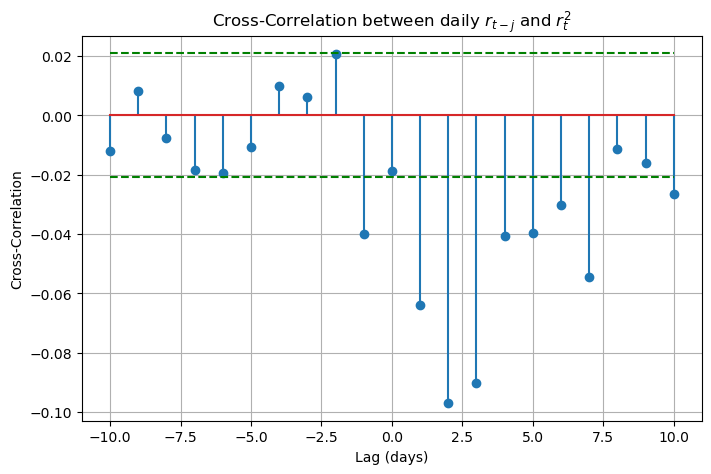

In [128]:
# cross correlation

# define a function
def ccf(x, y, lag_max = 100):
    # compute correlation
    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    # define the length
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)

    return result[lo:hi]

# choose the max lag and execute the function
lag_max = 10
cross_corr = ccf(log_rt_dy,log_squared_rt_dy,lag_max=lag_max)


# plot results
lags = np.arange(-lag_max, lag_max + 1)

# ACF of monthly log returns with confidence bands
confint_daily = 1.96 / np.sqrt(len(log_rt_dy))
confint_daily_upper = np.full(len(lags), confint_daily)
confint_daily_lower = -np.full(len(lags), confint_daily)

plt.figure(figsize=(8, 5))
plt.stem(lags, cross_corr)
plt.plot(lags, confint_daily_upper, color='green', linestyle='dashed')
plt.plot(lags, confint_daily_lower, color='green', linestyle='dashed')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between daily $r_{t-j}$ and $r_t^2$')
plt.grid(True)


plt.show()

C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\1221027790.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  VIX = yf.download("^VIX", start="1989-12-31", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


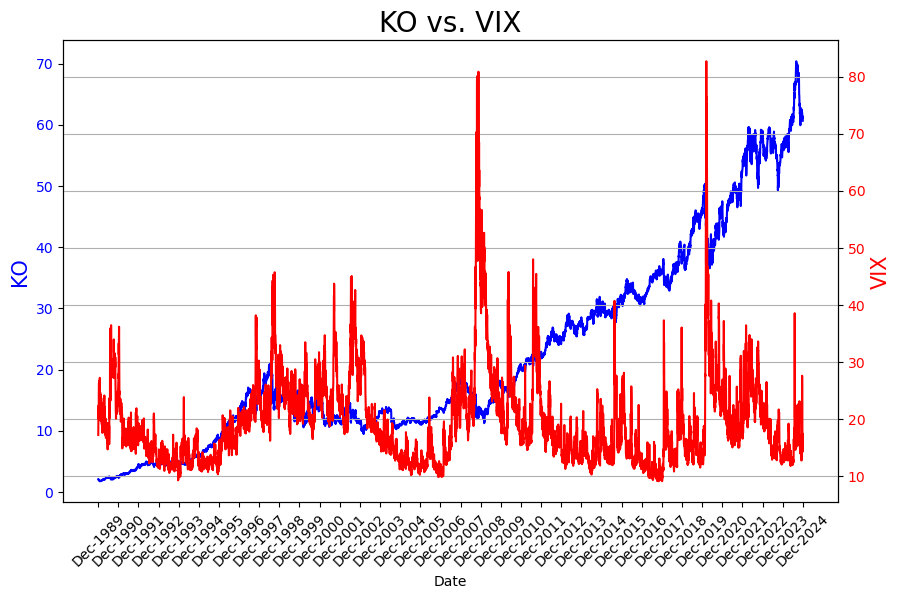

In [130]:
# get VIX data
VIX = yf.download("^VIX", start="1989-12-31", end="2024-12-31")

# extract the adjusted closing prices
Pt_d = KO["Close"]
VIX_d = VIX["Close"]

# rename the columns
VIX_d = VIX_d.rename(columns={VIX_d.columns[0]: "VIX.d"})
Pt_d = Pt_d.rename(columns={Pt_d.columns[0]: "Pt.d"})

# mutate the Index into a DatetimeIndex
VIX_d.index = pd.to_datetime(VIX_d.index)  

# merge the two datasets and rename columns
merged_df = pd.merge(Pt_d, VIX_d, on='Date', how='outer') # outer: only commond indexes (dates)
merged_df.head()

# Compute changes in pt and VIX compared to previous period (NaN are kept)
diff_df = merged_df.diff()
diff_df.head()

# remove from the price dataframe
merged_df = merged_df.dropna()
# and from the second one
diff_df = diff_df.dropna()

# define the figure parameters
fig, ax1 = plt.subplots(figsize=(10, 6))

# Customizing x-axis labels for December of each year
date_labels = pd.date_range(start='1989-12-31', end='2024-12-31', freq='YE-DEC')
formatted_labels = [f'Dec-{date.year}' for date in date_labels]
# Add label and rotate them
plt.xticks(date_labels, formatted_labels, rotation=45)

# work on the first y-axis: S&P
ax1.plot(merged_df.index, merged_df['Pt.d'], label='KO Prices', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('KO',size=15, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# work on the second y-axis: VIX
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['VIX.d'], label='VIX', color='red')
ax2.set_ylabel('VIX',size=15, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add labels to the chart
plt.title('KO vs. VIX',size=20)
plt.grid(True)

# show
plt.show()

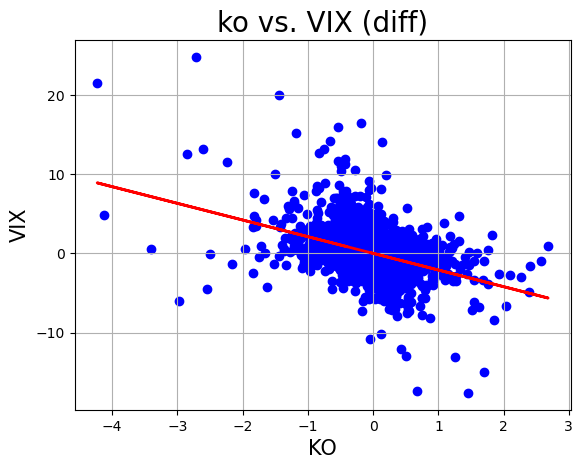

In [131]:
plt.scatter(diff_df['Pt.d'], diff_df['VIX.d'], color='blue', marker='o')

#add labels and title
plt.xlabel('KO',size=15)
plt.ylabel('VIX',size=15)
plt.title('ko vs. VIX (diff)',size=20)
plt.grid(True)

# add regression line
coefficients = np.polyfit(diff_df['Pt.d'], diff_df['VIX.d'], 1)
regression_line = np.polyval(coefficients, diff_df['Pt.d'])

plt.plot(diff_df['Pt.d'], regression_line, color='red', linewidth=2)


# show plot
plt.show()

ATTENTION rt stands for log-return and Rt for le return

# Question 2

# periode selected : 1990-2019 : the longest period that we can make that contains both FF factors and monthly log return data

create the data frame for FF factors & RF and another for KO monthly log return (rt)

In [446]:
# create a data frame with the FF factors and RF from the csv file
ff = pd.read_csv(r"C:\Users\zerbi\Downloads\FF_Research_Data_Factors_monthly.CSV", skiprows=3)
ff.columns = ['Date','Mkt-RF','SMB','HML','RF']
ff = ff.dropna().iloc[:-1]
ff['Date'] = ff['Date'].astype(int)
ff = ff.set_index('Date').astype(float)

# data + time period
ticker = "KO"   
start = "1990-01-31" # set the defined period 
end = "2019-06-30"

# DOWNLOAD KO DATA AND COMPUTE MONTHLY LOG RETURNS

#download data
KO = yf.download(ticker, start=start, end=end, progress=False)
KO = KO["Close"]

#compute monthly price and monthly log-returns for KO
KO_monthly = KO.resample("M").last()
r = np.log(KO_monthly /KO_monthly.shift(1)).dropna() * 100 # we multiplied by 100 since the FF factors and the RF are in %

r.index = r.index.strftime("%Y%m").astype(int)

#create a data frame for KO monthly rt
r = pd.DataFrame(r).rename(columns={r.columns[0]: "KO"})

#showcase the top of the data
r.head()
ff.head() #the values are in %

C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\3623234232.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  KO = yf.download(ticker, start=start, end=end, progress=False)
C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\3623234232.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  KO_monthly = KO.resample("M").last()


,Mkt-RF,SMB,HML,RF
Date,,,,
192607,2.96,-2.30,-2.87,0.22
192608,2.64,-1.40,4.19,0.25
192609,0.36,-1.32,0.01,0.23
192610,-3.24,0.04,0.51,0.32
192611,2.53,-0.20,-0.35,0.31


 We apply the period of time we want 

In [449]:
#set the same date/ restrict FF factors to the same time window
start_yyyymm = r.index.min()
end_yyyymm = r.index.max()
ff = ff[(ff.index >= start_yyyymm) & (ff.index <= end_yyyymm)]

# Running Regression

In [450]:
# Merge the datasets
data = r.join(ff, how="inner")
data.head()#the values are in %

,KO,Mkt-RF,SMB,HML,RF
Date,,,,,
199002,2.331924,1.11,1.03,0.61,0.57
199003,6.407881,1.83,1.52,-2.90,0.64
199004,1.986743,-3.36,-0.50,-2.55,0.69
199005,16.856689,8.42,-2.57,-3.74,0.68
199006,-1.223035,-1.09,1.43,-1.94,0.63


In [451]:
#compute excess monthly log returns

data['KO_excess_rt'] = data["KO"] - data["RF"]
data.head() #the values are in %

,KO,Mkt-RF,SMB,HML,RF,KO_excess_rt
Date,,,,,,
199002,2.331924,1.11,1.03,0.61,0.57,1.761924
199003,6.407881,1.83,1.52,-2.90,0.64,5.767881
199004,1.986743,-3.36,-0.50,-2.55,0.69,1.296743
199005,16.856689,8.42,-2.57,-3.74,0.68,16.176689
199006,-1.223035,-1.09,1.43,-1.94,0.63,-1.853035


 # in all the table the values are in %
If we want to convert them in decimal number we divide them by 100

plot the regression (CAPM model)

In [452]:
#CAPM regression

# independent variables : KO excess monthly (log-)returns 
y = data['KO_excess_rt']

# CAPM  We build the X1 matrix for the regressions
X1 = sm.add_constant(data["Mkt-RF"])

#estimation of the model
capm = sm.OLS(y, X1).fit()

#Results here the estimates coefficient are in % so we have to be carefull when interpreting
print("\n=== CAPM ===")
print(capm.summary())


=== CAPM ===
                            OLS Regression Results                            
Dep. Variable:           KO_excess_rt   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     67.45
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           4.22e-15
Time:                        00:16:04   Log-Likelihood:                -1083.6
No. Observations:                 352   AIC:                             2171.
Df Residuals:                     350   BIC:                             2179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2927      0.284      

# The estimated values for the alpha are in % (Beta is decimal)

plot the regression (3 FF model)

In [453]:
# Fama-French 3 factors

# Fama-French 3 factors model : We create the matrix of regressors by adding a column of 1 to the 3 factors model
X2 = sm.add_constant(data[["Mkt-RF","SMB","HML"]])

#perform FF 3factors model regression 
ff3 = sm.OLS(y, X2).fit()

#Results here the estimates coefficient are in % so we have to be carefull when interpreting
print("Fama-French 3 Factors",ff3.summary())
print()

Fama-French 3 Factors                             OLS Regression Results                            
Dep. Variable:           KO_excess_rt   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     32.22
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           2.11e-18
Time:                        00:16:13   Log-Likelihood:                -1071.5
No. Observations:                 352   AIC:                             2151.
Df Residuals:                     348   BIC:                             2166.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3037      0.2

C:\Users\zerbi\AppData\Local\Temp\ipykernel_48784\2888685175.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


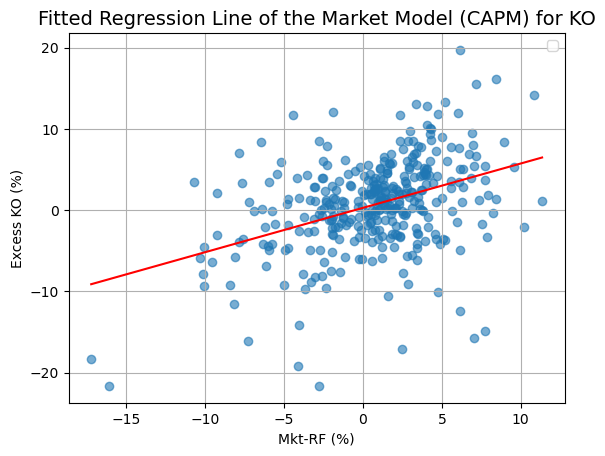

In [454]:
#graph capm 
plt.scatter(data["Mkt-RF"], data["KO_excess_rt"], alpha=.6)
x = np.linspace(data["Mkt-RF"].min(), data["Mkt-RF"].max(), 100)
plt.plot(x, capm.params['const'] + capm.params['Mkt-RF'] * x, color='red')
plt.xlabel('Mkt-RF (%)')
plt.ylabel('Excess KO (%)')
plt.grid(True)
plt.legend()
plt.title('Fitted Regression Line of the Market Model (CAPM) for KO', fontsize=14)
plt.show()

# set the value in decimal number: perform the regression in decimal value : here all the coefficient are decimal

In [459]:
# put FF factors and RF in decimal numbers

data[['Mkt-RF', 'SMB', 'HML', 'RF','KO_excess_rt']] = data[['Mkt-RF', 'SMB', 'HML', 'RF','KO_excess_rt']] / 100
data.head()

,KO,Mkt-RF,SMB,HML,RF,KO_excess_rt
Date,,,,,,
199002,2.331924,0.0111,0.0103,0.0061,0.0057,0.017619
199003,6.407881,0.0183,0.0152,-0.0290,0.0064,0.057679
199004,1.986743,-0.0336,-0.0050,-0.0255,0.0069,0.012967
199005,16.856689,0.0842,-0.0257,-0.0374,0.0068,0.161767
199006,-1.223035,-0.0109,0.0143,-0.0194,0.0063,-0.018530


In [460]:
#CAPM regression

# independent variables : KO excess monthly (log-)returns 
y = data['KO_excess_rt']

# CAPM  We build the X1 matrix for the regressions
X1 = sm.add_constant(data["Mkt-RF"])

#estimation of the model
capm = sm.OLS(y, X1).fit()

#Results here the estimates coefficient are in % so we have to be carefull when interpreting
print("\n=== CAPM ===")
print(capm.summary())


=== CAPM ===
                            OLS Regression Results                            
Dep. Variable:           KO_excess_rt   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     67.45
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           4.22e-15
Time:                        00:26:16   Log-Likelihood:                 537.44
No. Observations:                 352   AIC:                            -1071.
Df Residuals:                     350   BIC:                            -1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0029      0.003      

In [461]:
# Fama-French 3 factors

# Fama-French 3 factors model : We create the matrix of regressors by adding a column of 1 to the 3 factors model
X2 = sm.add_constant(data[["Mkt-RF","SMB","HML"]])

#perform FF 3factors model regression 
ff3 = sm.OLS(y, X2).fit()

#Results here the estimates coefficient are in % so we have to be carefull when interpreting
print("Fama-French 3 Factors",ff3.summary())
print()

Fama-French 3 Factors                             OLS Regression Results                            
Dep. Variable:           KO_excess_rt   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     32.22
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           2.11e-18
Time:                        00:31:59   Log-Likelihood:                 549.56
No. Observations:                 352   AIC:                            -1091.
Df Residuals:                     348   BIC:                            -1076.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.0